#**2** a)Build an CNN based image classifier (at least 3 - 5 categories) from a custom data set 

## Using Keras Preprocessing for Image classification.

Custom Dataset corresponds to 3 different Dog Breeds--'Abyssinian', 'American_bulldog', 'Beagle'

Training Dataset includes 12 images (Each class includes 4 images)

Validation dataset includes 6 images in total (Each class includes 2 images) 

In [1]:
!pip install keras

In [2]:
import matplotlib.image as mpimg
from  matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

###Using Image Data generator for loading image dataset

In [20]:

# load train data
train = r"/content/drive/MyDrive/cmpe-258/train"
# load val data
val = r"/content/drive/MyDrive/cmpe-258/test"


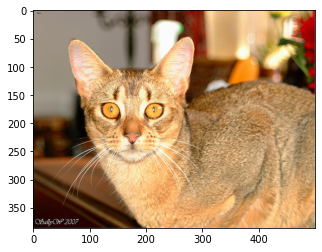

In [21]:
#Image testing
test_image=r"/content/drive/MyDrive/cmpe-258/train/Abyssinian/Abyssinian_98.jpg"
img=mpimg.imread(test_image)
plt.imshow(img)

In [22]:
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     zoom_range=0.2, 
                                     rotation_range=65,
                                     shear_range=0.09,
                                     horizontal_flip=True,
                                     vertical_flip=True)

In [23]:
batch_size=2
IMG_WIDTH=200
IMG_HEIGHT=200
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 12 images belonging to 3 classes.


In [24]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 6 images belonging to 3 classes.


In [25]:
train_data_gen.class_indices.keys()

dict_keys(['Abyssinian', 'American_bulldog', 'Beagle'])

In [26]:
len(train_data_gen)

6

In [27]:
len(val_data_gen)

3

##Building CNN Model

In [28]:
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(200, 200, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=3, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 25)      1900      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 25)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 50)        31300     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 50)        200       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 70)        31570     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 70)         

In [30]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [32]:
# fit on data for 25 epochs
history = model.fit(train_data_gen,steps_per_epoch=len(train_data_gen)//batch_size, validation_data=val_data_gen, epochs=25)

Epoch 1/25
3/3 [==============================] - 1s 330ms/step - loss: 1.1477 - accuracy: 0.5000 - val_loss: 0.9451 - val_accuracy: 0.6667
Epoch 2/25
3/3 [==============================] - 1s 251ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.9697 - val_accuracy: 0.3333
Epoch 3/25
3/3 [==============================] - 1s 272ms/step - loss: 0.5737 - accuracy: 0.8333 - val_loss: 0.9632 - val_accuracy: 0.3333
Epoch 4/25
3/3 [==============================] - 1s 274ms/step - loss: 0.2452 - accuracy: 0.8333 - val_loss: 0.8647 - val_accuracy: 0.6667
Epoch 5/25
3/3 [==============================] - 1s 281ms/step - loss: 0.7625 - accuracy: 0.8333 - val_loss: 0.9012 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 1s 260ms/step - loss: 0.9552 - accuracy: 0.8333 - val_loss: 1.0284 - val_accuracy: 0.3333
Epoch 7/25
3/3 [==============================] - 1s 269ms/step - loss: 0.7161 - accuracy: 0.6667 - val_loss: 1.0408 - val_accuracy: 0.3333
Epoch 8/25
3/3 [====